In [ ]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import imblearn as imb
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [26]:
path = '/Users/alexzhu/desktop/TrafficClassification/HackathonData/MachineLearningCSV'
substring = 'csv'
for d, r, f in os.walk(path):
    for files in f:
        print(os.path.join(d, files))

/Users/alexzhu/desktop/TrafficClassification/HackathonData/MachineLearningCSV/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/Users/alexzhu/desktop/TrafficClassification/HackathonData/MachineLearningCSV/Monday-WorkingHours.pcap_ISCX.csv
/Users/alexzhu/desktop/TrafficClassification/HackathonData/MachineLearningCSV/Friday-WorkingHours-Morning.pcap_ISCX.csv
/Users/alexzhu/desktop/TrafficClassification/HackathonData/MachineLearningCSV/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/Users/alexzhu/desktop/TrafficClassification/HackathonData/MachineLearningCSV/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/Users/alexzhu/desktop/TrafficClassification/HackathonData/MachineLearningCSV/Tuesday-WorkingHours.pcap_ISCX.csv
/Users/alexzhu/desktop/TrafficClassification/HackathonData/MachineLearningCSV/Wednesday-workingHours.pcap_ISCX.csv
/Users/alexzhu/desktop/TrafficClassification/HackathonData/MachineLearningCSV/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


In [27]:
dataFrames = [pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]
index = 0
path = '/Users/alexzhu/desktop/TrafficClassification/HackathonData/MachineLearningCSV'
substring = 'csv'
for d, r, f in os.walk(path):
    for files in f:
        dataFrames[index] = pd.read_csv(os.path.join(d,files))
        index = index + 1

In [28]:
df = pd.concat([dataFrames[0], dataFrames[1], dataFrames[2], dataFrames[3], dataFrames[4], dataFrames[5], dataFrames[6], dataFrames[7]])

In [29]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [30]:
df.columns = df.columns.str.replace(' Label', 'Label')

In [31]:
print(df['Label'])

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
170361    BENIGN
170362    BENIGN
170363    BENIGN
170364    BENIGN
170365    BENIGN
Name: Label, Length: 2830743, dtype: object


In [32]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max          

In [34]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [35]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [36]:
df.loc[df.Label  != 'BENIGN', 'Label'] = 'ATTACK'
malicious_traffic = ['ATTACK'] 
background_traffic= ['BENIGN']
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [37]:
# i = 0
# while(i < df.shape[0]):
#     if(df.at[i, ' Label'] is not 'BENIGN'):
#         df[' Label'][i] = 'Malicious'
#         i = i+1

In [38]:
label_encoder = preprocessing.LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [39]:
y = df['Label']
X = df.drop(df.columns[[14, 15, 31, 33, 56, 57, 58, 59, 60, 61]], axis = 1)

## Resampling

In [40]:
y.value_counts()

1    2272688
0     556697
Name: Label, dtype: int64

<AxesSubplot:ylabel='Label'>

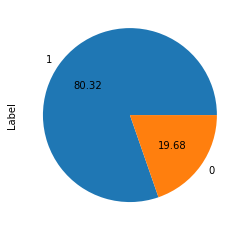

In [41]:
y.value_counts().plot.pie(autopct = '%.2f')

In [42]:
rand = RandomUnderSampler(sampling_strategy = 1)
X_res, y_res = rand.fit_resample(X,y)


In [43]:
y_res.value_counts()

0    556697
1    556697
Name: Label, dtype: int64

<AxesSubplot:ylabel='Label'>

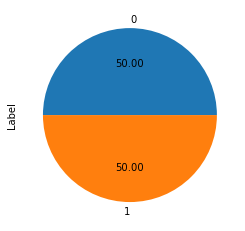

In [44]:
y_res.value_counts().plot.pie(autopct = '%.2f')

Normalization

In [45]:
X_res = X_res.apply(lambda  x: (x-x.min(axis=0)) / (x.max(axis = 0) - x.min(axis = 0)))

In [46]:
X_res.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.006775,0.355534,0.000019,0.000021,0.000049,4.621978e-07,0.003747,0.000000,0.004747,0.005513,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1,0.006775,0.000017,0.000005,0.000000,0.000004,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
2,0.006775,0.999932,0.025789,0.019461,1.000000,5.305904e-05,0.051330,0.000000,0.087351,0.028967,...,1.0,0.009503,0.011794,0.015103,0.003904,0.067867,0.02369,0.078601,0.057132,0.0
3,0.006775,0.041710,0.000065,0.000053,0.000000,1.429478e-07,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
4,0.006775,0.999776,0.020432,0.015407,0.809975,4.168357e-05,0.051289,0.002581,0.089297,0.037275,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res)

In [48]:
%store X_train
%store X_test
%store y_train
%store y_test

Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
